## SLE-мода
Ищем решение уравнений Максвелла в каждом из кусков с постоянным заполнением в следующем виде

In [19]:
var("x,y,z,kx,kz,k,epsilon,mu")
Ax=function("Ax")(y)
Az=function("Az")(y)
Bx=function("Bx")(y)
By=function("By")(y)
Bz=function("Bz")(y)

In [42]:
Ex=Ax*cos(kx*x)*exp(i*kz*z)
Ey=0
Ez=Az*sin(kx*x)*exp(i*kz*z)
Hx=Bx*sin(kx*x)*exp(i*kz*z)
Hy=By*cos(kx*x)*exp(i*kz*z)
Hz=Bz*cos(kx*x)*exp(i*kz*z)
E=[Ex,Ey,Ez]
H=[Hx,Hy,Hz]

In [49]:
def rot(Ax,Ay,Az):
    return [diff(Az,y)-diff(Ay,z), -diff(Az,x)+diff(Ax,z), diff(Ay,x)-diff(Ax,y)]

In [50]:
eqs=list(vector(rot(*E))+i*k*mu*vector(H))+list(vector(rot(*H))-i*k*epsilon*vector(E))

In [74]:
eqs=[(eq.factor_list())[0][0] for eq in eqs]

In [85]:
eqs

[I*k*mu*Bx(y) + diff(Az(y), y),
 I*k*mu*By(y) + I*kz*Ax(y) - kx*Az(y),
 -I*k*mu*Bz(y) + diff(Ax(y), y),
 -I*epsilon*k*Ax(y) - I*kz*By(y) + diff(Bz(y), y),
 I*kz*Bx(y) + kx*Bz(y),
 I*epsilon*k*Az(y) + kx*By(y) + diff(Bx(y), y)]

In [120]:
S={Bx: Bx.subs(solve(eqs[0],Bx)), diff(Bx,y): diff(Bx.subs(solve(eqs[0],Bx)),y), \
  By: By.subs(solve(eqs[1],By)), diff(By,y): diff(By.subs(solve(eqs[1],By)),y), \
  Bz: Bz.subs(solve(eqs[2],Bz)), diff(Bz,y): diff(Bz.subs(solve(eqs[2],Bz)),y)}
S2={Az: -i*kx/kz*Ax, diff(Az,y): diff(-i*kx/kz*Ax,y), diff(Az,y,y): diff(-i*kx/kz*Ax,y,y)}

In [121]:
[eq.subs(S) for eq in eqs]

[0,
 0,
 0,
 -I*epsilon*k*Ax(y) + I*(kz*Ax(y) + I*kx*Az(y))*kz/(k*mu) - I*diff(Ax(y), y, y)/(k*mu),
 -I*kx*diff(Ax(y), y)/(k*mu) - kz*diff(Az(y), y)/(k*mu),
 I*epsilon*k*Az(y) - (kz*Ax(y) + I*kx*Az(y))*kx/(k*mu) + I*diff(Az(y), y, y)/(k*mu)]

In [123]:
[(eq.subs(S).subs(S2)).factor() for eq in eqs]

[0,
 0,
 0,
 (-I*epsilon*k^2*mu*Ax(y) + I*kx^2*Ax(y) + I*kz^2*Ax(y) - I*diff(Ax(y), y, y))/(k*mu),
 0,
 (epsilon*k^2*mu*Ax(y) - kx^2*Ax(y) - kz^2*Ax(y) + diff(Ax(y), y, y))*kx/(k*kz*mu)]

Уравнения Максвелла сводятся к одному уравнени
$$
A_x'' + (\varepsilon\mu k^2 - k_x^2 - k_z^2) A_x =0
$$

## Граничные условия
* На границе $x=0, L_x$ имеем $E_y=E_z=0$, откуда $\sin(k_x L_x)=0$. Поэтому берем 
$$
k_x = \frac{\pi n}{L_x}, \quad n\in \mathbb{N}
$$
* На границе $y=0, L_y$ имеем $E_x=E_z=0$, откуда 
$$
A_x(0)=A_x(L_y)=0.
$$
* На разрыве $y=L_y/2$ имеем требование непрерывности $E_x, E_z$ и $H_x, H_z$. Первое дает непреррывность $A_x$, второе -- непрерывность $A_x'$.

Решение при $y<L_y/2$ 
$$
A_x=a \sin(\sqrt{\varepsilon_1\mu k^2 - k_x^2 - k_z^2}y)
$$
Решение при $y>L_y/2$ 
$$
A_x=b \sin(\sqrt{\varepsilon_0\mu k^2 - k_x^2 - k_z^2}(L_y-y))
$$
При $y=L_y/2$ имеем
$$
a \sin(\sqrt{\varepsilon_1\mu k^2 - k_x^2 - k_z^2}L_y/2)=b \sin(\sqrt{\varepsilon_0\mu k^2 - k_x^2 - k_z^2}L_y/2)
$$
и
$$
a \sqrt{\varepsilon_1\mu k^2 - k_x^2 - k_z^2} \cos(\sqrt{\varepsilon_1\mu k^2 - k_x^2 - k_z^2}L_y/2)=-b \sqrt{\varepsilon_0\mu k^2 - k_x^2 - k_z^2} \cos(\sqrt{\varepsilon_0\mu k^2 - k_x^2 - k_z^2}L_y/2)
$$

In [171]:
epsilon0=1
epsilon1=2
mu=1
Lx=1
Ly=2
n=1
kx=pi*n/Lx
a11=sin(sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*Ly/2)
a12=sin(sqrt(epsilon0*mu*k^2 - kx^2 - kz^2)*Ly/2)
a21=sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*cos(sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*Ly/2)
a22=-sqrt(epsilon0*mu*k^2 - kx^2 - kz^2)*cos(sqrt(epsilon0*mu*k^2 - kx^2 - kz^2)*Ly/2)

In [172]:
A=matrix([[a11,a12],[a21,a22]])
A.det()

-sqrt(-pi^2 + k^2 - kz^2)*cos(sqrt(-pi^2 + k^2 - kz^2))*sin(sqrt(-pi^2 + 2*k^2 - kz^2)) - sqrt(-pi^2 + 2*k^2 - kz^2)*cos(sqrt(-pi^2 + 2*k^2 - kz^2))*sin(sqrt(-pi^2 + k^2 - kz^2))

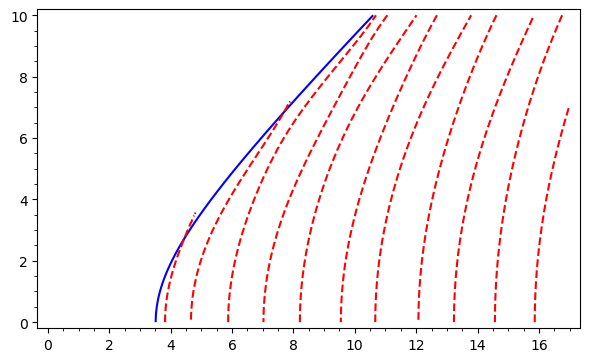

In [176]:
implicit_plot(epsilon0*mu*k^2 - kx^2 - kz^2==(pi*1/Ly)^2, (k,0,17),(kz,0,10)) + implicit_plot(A.det()==0, (k,0,17),(kz,0,10), color="red", linestyle="--")

In [178]:
A.det().subs([kz==0, k==2.72261944454697]).n()

-1.38121794173893e-16 + 0.00205732732956543*I

In [181]:
a11=sin(sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*Ly/2)
a12=sinh(sqrt(kx^2 + kz^2 -epsilon0*mu*k^2)*Ly/2)
a21=-sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*cos(sqrt(epsilon1*mu*k^2 - kx^2 - kz^2)*Ly/2)
a22=sqrt(kx^2 + kz^2 -epsilon0*mu*k^2)*cosh(sqrt(kx^2 + kz^2 -epsilon0*mu*k^2)*Ly/2)
A=matrix([[a11,a12],[a21,a22]])

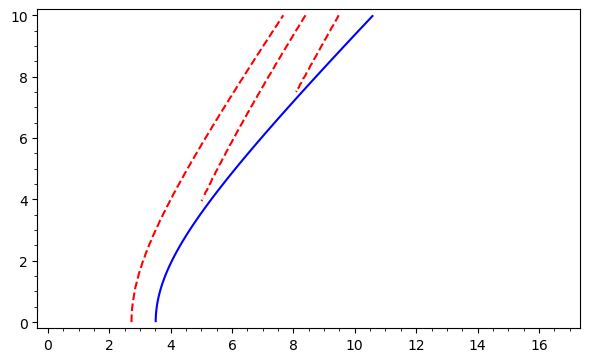

In [182]:
implicit_plot(epsilon0*mu*k^2 - kx^2 - kz^2==(pi*1/Ly)^2, (k,0,17),(kz,0,10)) + implicit_plot(A.det()==0, (k,0,17),(kz,0,10), color="red", linestyle="--")